In [1]:
import pandas as pd


In [18]:
df_orig = pd.read_csv("/home/mascit/Downloads/dataset_Hanna_updated_preprocessed.csv")

In [19]:
df_orig

,sgRNA sequence,A_Content,T_Content,C_Content,G_Content,GC_Content,Tm_Global,Tm_PAM_Proximal,Tm_Middle,Stem_Loop,...,offtargets-filter,BE39:MELJUSO:zscore,CAS9:MELJUSO:zscore,BE39:A375:zscore,CAS9:A375:zscore,BE4max:A375:zscore,BE39:OVCAR8:zscore,BE39:HAP1:zscore,BE39:HA1E:zscore,sgRNA_23bp
0,CAGGAGATGACCCTCAGGGA,0.521013,-0.755550,-0.305213,0.458613,0.141927,0.141927,0.365321,0.093982,0.588149,...,True,0.394298,-3.484759,0.068712,-3.175448,0.216139,0.407211,-0.032099,-0.026550,CAGGAGATGACCCTCAGGGATGG
1,GGGATGGCTTGTCCTTCTCC,-1.183685,1.095939,0.111724,0.056959,0.141927,0.141927,0.365321,0.093982,0.588149,...,True,0.209464,-0.538376,0.668584,0.426947,0.196144,0.607373,0.484872,0.231833,GGGATGGCTTGTCCTTCTCCAGG
2,CTGGACAGAAGAAGCCCTGC,1.373361,-1.218422,0.111724,-0.344696,-0.204428,-0.204428,-0.319927,0.093982,0.588149,...,True,-0.295201,3.328774,-0.217575,1.545336,-0.060629,0.125405,0.449511,0.492185,CTGGACAGAAGAAGCCCTGCTGG
3,CAGTGGACCACCACGAAGTG,0.947187,-1.218422,0.111724,0.056959,0.141927,0.141927,0.365321,0.093982,0.588149,...,True,1.595953,3.173843,0.433987,-0.944263,0.377231,0.998492,1.005886,1.391818,CAGTGGACCACCACGAAGTGAGG
4,CCGGCTGCAGGCCCTGGAGA,-0.331336,-1.218422,0.528661,0.860267,1.180993,1.180993,0.365321,1.585017,0.588149,...,True,0.701098,-3.571589,-0.025089,-3.310554,0.763524,0.408244,0.221329,1.136270,CCGGCTGCAGGCCCTGGAGAAGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,TTTGGTCAACGCATAGCTTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,0.747479,1.548398,0.131336,1.506335,-0.032595,0.143059,0.589777,0.535504,TTTGGTCAACGCATAGCTTGnan
12069,TTTTACCTTGTTCACATGGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,-1.124342,1.262568,-0.775274,1.153459,-0.881589,-1.065155,-1.196225,-0.398767,TTTTACCTTGTTCACATGGAnan
12070,TTTTGACTCTAATCACCGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,0.481398,1.231205,0.402209,0.524636,-0.095439,0.138866,0.148855,0.301906,TTTTGACTCTAATCACCGGTnan
12071,TTTTTAATACAAGGTAATCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,0.887199,NaN,1.001815,-3.803071,NaN,NaN,NaN,TTTTTAATACAAGGTAATCTnan


In [27]:
df = df_orig[["sgRNA sequence", "sgRNA_23bp", "BE39:MELJUSO:zscore"]].copy()
df = df.rename({"sgRNA sequence": "sequence_orig", "sgRNA_23bp": "sequence", "BE39:MELJUSO:zscore": "label"}, axis=1)
df = df[~df["label"].isna()]

df["label"] = df["label"].apply(lambda x: round(x, 1))
df["label"] = df["label"].apply(lambda x: x if x >= -4 else -4.0)
df["task"] = "BE39:MELJUSO:zscore"

In [28]:
df

,sequence_orig,sequence,label,task
0,CAGGAGATGACCCTCAGGGA,CAGGAGATGACCCTCAGGGATGG,0.4,BE39:MELJUSO:zscore
1,GGGATGGCTTGTCCTTCTCC,GGGATGGCTTGTCCTTCTCCAGG,0.2,BE39:MELJUSO:zscore
2,CTGGACAGAAGAAGCCCTGC,CTGGACAGAAGAAGCCCTGCTGG,-0.3,BE39:MELJUSO:zscore
3,CAGTGGACCACCACGAAGTG,CAGTGGACCACCACGAAGTGAGG,1.6,BE39:MELJUSO:zscore
4,CCGGCTGCAGGCCCTGGAGA,CCGGCTGCAGGCCCTGGAGAAGG,0.7,BE39:MELJUSO:zscore
...,...,...,...,...
12067,TTTGGGTTTATCCGCCCCCA,TTTGGGTTTATCCGCCCCCAnan,0.5,BE39:MELJUSO:zscore
12068,TTTGGTCAACGCATAGCTTG,TTTGGTCAACGCATAGCTTGnan,0.7,BE39:MELJUSO:zscore
12069,TTTTACCTTGTTCACATGGA,TTTTACCTTGTTCACATGGAnan,-1.1,BE39:MELJUSO:zscore
12070,TTTTGACTCTAATCACCGGT,TTTTGACTCTAATCACCGGTnan,0.5,BE39:MELJUSO:zscore


In [26]:
len(df[df["sequence"].str.contains("nan")])

982

<Axes: ylabel='Frequency'>

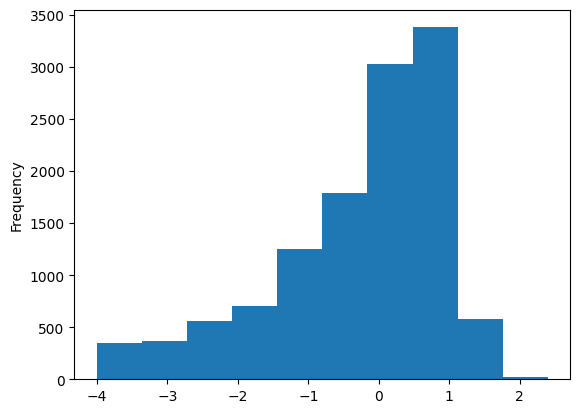

In [25]:
df["label"].plot.hist()

In [11]:
df["sequence"].apply(len).unique()

array([23])

In [12]:
len(df[~df["label"].isna()])

12032

In [34]:
from datasets import DatasetDict, Dataset

df_train = df.sample(frac=0.8, random_state=42)
df_val = df.drop(df_train.index)

ds = DatasetDict({"train": Dataset.from_pandas(df_train, preserve_index=False), "test": Dataset.from_pandas(df_val, preserve_index=False)})

In [35]:
ds

DatasetDict({
    train: Dataset({
        features: ['sequence_orig', 'sequence', 'label', 'task'],
        num_rows: 9626
    })
    test: Dataset({
        features: ['sequence_orig', 'sequence', 'label', 'task'],
        num_rows: 2406
    })
})

In [36]:
ds.save_to_disk("/media/mascit/datasets/nucleotides_std")

Saving the dataset (1/1 shards): 100%|██████████| 2406/2406 [00:00<00:00, 408000.95 examples/s]


In [ ]:
df